# Image Resoration - Group 11.5

# 1.Data preprocessing

1.1 Load image data

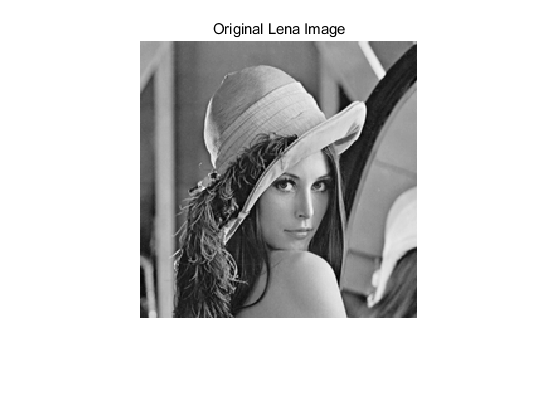

In [1]:
load 'C:\Users\lqx\Downloads\img_restoration.mat';

% Normalize the pixel value to [0,1]
I=I1/255;

% Show Original Image
imshow(I1,[]);
title('Original Lena Image')

1.2 Image Degradation

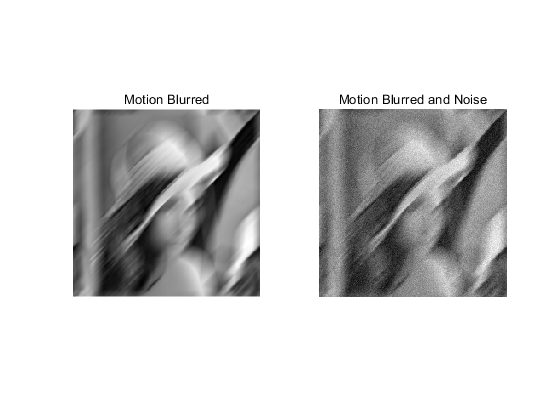

In [5]:
% Simulate a motion blur.
LEN = 25;
THETA = 45;
PSF = fspecial('motion', LEN, THETA);
blurred = imfilter(I, PSF, 'conv', 'circular');

% Simulate additive noise.
noise_mean = 0;
noise_var = 0.001;
blurred_noisy = imnoise(blurred, 'gaussian',noise_mean, noise_var);

% Show distorted image
subplot(1,2,1)
imshow(blurred,[]);
title('Motion Blurred')

subplot(1,2,2)
imshow(blurred_noisy,[])
title('Motion Blurred and Noise')


# 2.Inverse filtering

2.1 Inverse filtering without noise

PSNR: 248  dB
SSIM: 1.00  



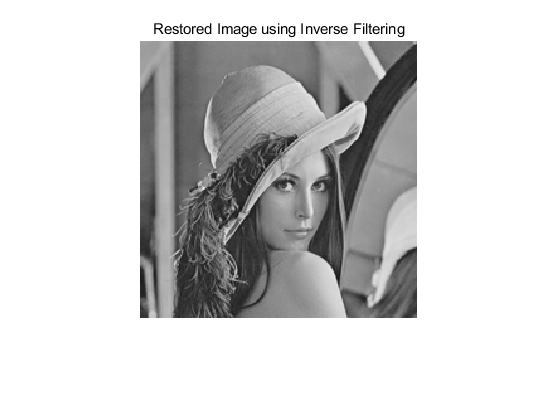

In [7]:
[H,W] = size(I);

% Inverse filtering
If = fft2(blurred);
Pf = psf2otf(PSF,[H,W]);
inverse_deblurred = ifft2(If./Pf);

%# Show restored image
imshow(inverse_deblurred)
title('Restored Image using Inverse Filtering')

% Calculate PSNR and SSIM
PSNR = psnr(inverse_deblurred,I);
fprintf('PSNR: %d  dB\n', round(PSNR));
SSIM = ssim(inverse_deblurred,I);
fprintf('SSIM: %.2f  \n',  SSIM );

2.2 Inverse filtering with noise

PSNR: -40  dB
SSIM: 0.00  



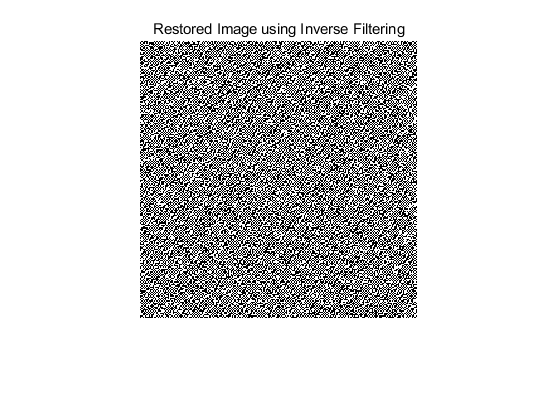

In [8]:
% Inverse filtering
If = fft2(blurred_noisy);
Pf = psf2otf(PSF,[H,W]);
inverse_deblurred = ifft2(If./Pf);

% Show restored image
imshow(inverse_deblurred)
title('Restored Image using Inverse Filtering')

% Calculate PSNR and SSIM
PSNR = psnr(inverse_deblurred,I);
fprintf('PSNR: %d  dB\n', round(PSNR));
SSIM = ssim(inverse_deblurred,I);
fprintf('SSIM: %.2f  \n',  SSIM );

# 3. Wiener filtering

3.1 Wiener filtering without noise

PSNR: 59  dB
SSIM: 1.00  



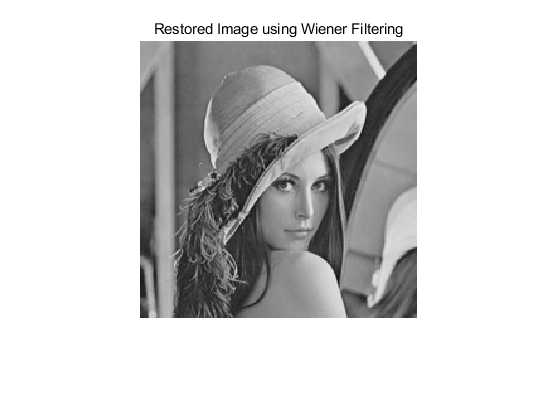

In [9]:
% Wiener filtering (k=0 for noise-free case)
estimated_nsr = 0;
wn_deblurred = deconvwnr(blurred, PSF, estimated_nsr);

% Show restored image
imshow(wn_deblurred)
title('Restored Image using Wiener Filtering');

% Calculate PSNR and SSIM
PSNR = psnr(wn_deblurred,I);
fprintf('PSNR: %d  dB\n', round(PSNR));
SSIM = ssim(wn_deblurred,I);
fprintf('SSIM: %.2f  \n',  SSIM );

3.2 Wiener filtering with noise

PSNR: 22  dB
SSIM: 0.46  



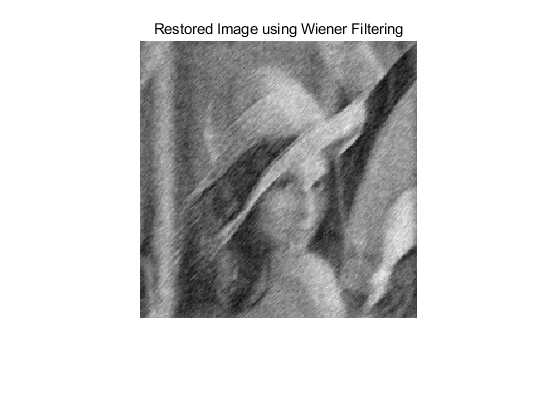

In [10]:
% Wiener filtering using the estimated NSR 
estimated_nsr = noise_var / var(I(:));
wn_deblurred = deconvwnr(blurred_noisy, PSF, estimated_nsr);

% Show restored image
imshow(wn_deblurred)
title('Restored Image using Wiener Filtering');

% Calculate PSNR and SSIM
PSNR = psnr(wn_deblurred,I);
fprintf('PSNR: %d  dB\n', round(PSNR));
SSIM = ssim(wn_deblurred,I);
fprintf('SSIM: %.2f  \n',  SSIM );

K=0.01  PSNR: 20  dB
        SSIM: 0.30  
K=0.02  PSNR: 22  dB
        SSIM: 0.41  
K=0.04  PSNR: 22  dB
        SSIM: 0.50  
K=0.06  PSNR: 21  dB
        SSIM: 0.54  
K=0.08  PSNR: 21  dB
        SSIM: 0.56  
K=0.10  PSNR: 20  dB
        SSIM: 0.57  
K=0.12  PSNR: 20  dB
        SSIM: 0.58  
K=0.14  PSNR: 19  dB
        SSIM: 0.58  
K=0.16  PSNR: 19  dB
        SSIM: 0.58  



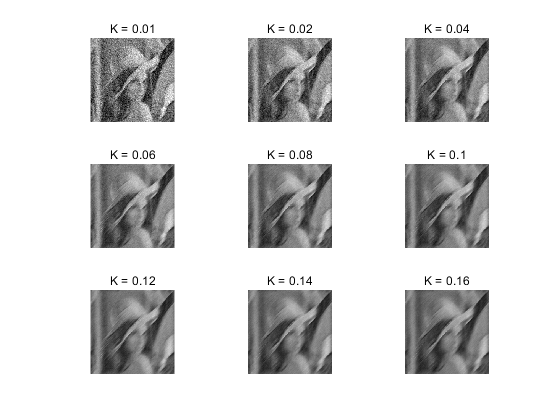

In [18]:
% Set different values for k around the estimated NSR  
K=[0.01 0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16];

% Wiener filtering with different k
for i=1:9
    wn_deblurred = deconvwnr(blurred_noisy, PSF, K(i));
    
    % Calculate PSNR and SSIM
    fprintf('K=%.2f  PSNR: %d  dB\n',K(i),round(psnr(wn_deblurred,I)));
    fprintf('        SSIM: %.2f  \n', ssim(wn_deblurred,I));
   
   % Show restored image
    subplot(3,3,i)
    imshow(wn_deblurred)
    title(['K = ', num2str(K(i))])
end

# 4. Constrained Least Squares Filtering 

4.1 Filtering without noise

PSNR: 34  dB
SSIM: 0.94  



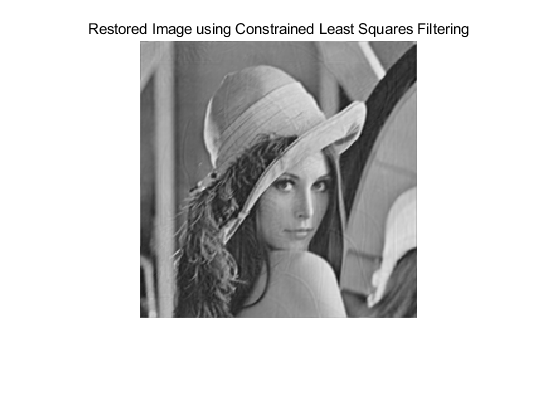

In [14]:
% Define the Laplacian operator
laplacian = [0 -1 0;-1 4 -1;0 -1 0];  

% Constrianed least squares filtering (noise-free)
J = edgetaper(blurred ,PSF);
CLS_deblurred = deconvreg(blurred,PSF,0,[1e-7 1e7],laplacian);

% Show restored image
imshow(CLS_deblurred)
title('Restored Image using Constrained Least Squares Filtering')

% Calculate PSNR and SSIM
PSNR = psnr(CLS_deblurred,I);
fprintf('PSNR: %d  dB\n', round(PSNR));
SSIM = ssim(CLS_deblurred,I);
fprintf('SSIM: %.2f  \n',  SSIM );

4.2 Filtering with noise

PSNR: 23  dB
SSIM: 0.64  



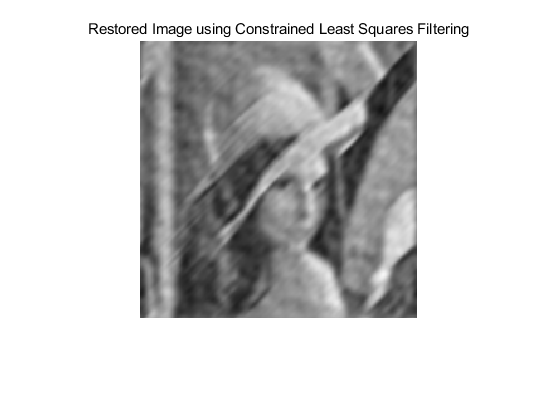

In [17]:
% Calculate additive noise power
yita = H * W * (noise_mean^2 + noise_var);

% Constrianed least squares filtering
J = edgetaper(blurred_noisy ,PSF);
CLS_deblurred = deconvreg(blurred_noisy,PSF,yita,[1e-7 1e7],laplacian);

% Show restored image
imshow(CLS_deblurred)
title('Restored Image using Constrained Least Squares Filtering')

% Calculate PSNR and SSIM
PSNR = psnr(CLS_deblurred,I);
fprintf('PSNR: %d  dB\n', round(PSNR));
SSIM = ssim(CLS_deblurred,I);
fprintf('SSIM: %.2f  \n',  SSIM );